In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
import os
import pandas as pd
data_dir = "data"
def add_train_use(data_dir, df=None):
    if df is None:
        df = pd.read_csv(f"{data_dir}/metadata.csv")
    train_files = [f for f in os.listdir(f"{data_dir}/train/malade/") if f[-4:]=='.png']
    train_files.extend(
        [f for f in os.listdir(f"{data_dir}/train/sain/") if f[-4:]=='.png']
    )
    valid_files = [f for f in os.listdir(f"{data_dir}/valid/malade/") if f[-4:]==".png"]
    valid_files.extend(
        [f for f in os.listdir(f"{data_dir}/valid/sain/") if f[-4:]==".png"]
    )
    df["train"] = df["Image Index"].apply(lambda x: x in train_files)
    return df

In [3]:
dataset = add_train_use(data_dir, df=None)
dataset

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],WEIGHTS,train
0,00000018_000.png,No Finding,0,18,75,M,PA,2500,2048,0.168000,0.168000,1,True
1,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168000,0.168000,1,True
2,00000056_001.png,Effusion,1,56,76,M,PA,2992,2991,0.143000,0.143000,1,True
3,00000104_000.png,Pleural_Thickening,0,104,68,F,PA,2906,2991,0.143000,0.143000,1,True
4,00000104_001.png,No Finding,1,104,69,F,PA,2734,2991,0.143000,0.143000,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,No Finding,0,30749,22,F,PA,2021,2021,0.194311,0.194311,1,True
5239,00030754_000.png,Infiltration,0,30754,54,M,PA,2020,2021,0.194314,0.194314,1,True
5240,00030792_000.png,No Finding,0,30792,10,F,PA,1775,1712,0.194311,0.194311,1,True
5241,00030792_001.png,No Finding,1,30792,10,F,PA,1663,1675,0.194311,0.194311,1,True


In [4]:
# NaN
print("Nombre de NaN : ", dataset.isna().sum())
dataset.rename(columns={'OriginalImage[Width': 'OriginalImage_width', 'Height]': 'OriginalImage_height', 'OriginalImagePixelSpacing[x': 'OriginalImagePixelSpacing_x', 'y]' : 'OriginalImagePixelSpacing_y'}, inplace=True)

Nombre de NaN :  Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
WEIGHTS                        0
train                          0
dtype: int64


Nous pouvons remarquer que notre dataframe ne contient pas de NaN, toutes les entrées sont complètes.

In [5]:
# On supprime les anomalies (comme un sexe différent pour la même ID de Patient) (On a au préalable vérifier que le nombre d'entrées concernées était minime)
# (comme cela leur suppression n'affectera pas nos données)
patient_counts = dataset.groupby('Patient ID')['Patient Gender'].nunique()

patients_to_remove = patient_counts[patient_counts > 1].index
print("On supprime : ", patients_to_remove.shape[0], " patients")

df_filtered = dataset[ ~dataset['Patient ID'].isin(patients_to_remove)]

On supprime :  0  patients


In [6]:
# on ne garde que les patients ayant un âge raisonable
# on peut se permettre de supprimer entièrement les entrées puisque le nombre d'entrées affectées est très faible comparé au nombre total d'entrées
print("On supprime : ", df_filtered[(df_filtered['Patient Age'] < 0)].shape[0] + df_filtered[(df_filtered['Patient Age'] > 120)].shape[0], " patients"   )
df_filtered = df_filtered[(df_filtered['Patient Age'] >= 0) & (df_filtered['Patient Age'] <= 120)]

On supprime :  0  patients


In [7]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,WEIGHTS,train
0,00000018_000.png,No Finding,0,18,75,M,PA,2500,2048,0.168000,0.168000,1,True
1,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168000,0.168000,1,True
2,00000056_001.png,Effusion,1,56,76,M,PA,2992,2991,0.143000,0.143000,1,True
3,00000104_000.png,Pleural_Thickening,0,104,68,F,PA,2906,2991,0.143000,0.143000,1,True
4,00000104_001.png,No Finding,1,104,69,F,PA,2734,2991,0.143000,0.143000,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,No Finding,0,30749,22,F,PA,2021,2021,0.194311,0.194311,1,True
5239,00030754_000.png,Infiltration,0,30754,54,M,PA,2020,2021,0.194314,0.194314,1,True
5240,00030792_000.png,No Finding,0,30792,10,F,PA,1775,1712,0.194311,0.194311,1,True
5241,00030792_001.png,No Finding,1,30792,10,F,PA,1663,1675,0.194311,0.194311,1,True


In [8]:
data_bool = df_filtered['OriginalImagePixelSpacing_x'] != df_filtered['OriginalImagePixelSpacing_y']
sum = data_bool.sum()
assert sum == 0 # toutes les valeurs des deux colonnes sont donc identiques (images carrées ?)
# on décide d'en supprimer une
df_filtered = df_filtered.drop('OriginalImagePixelSpacing_y', axis='columns')

In [9]:
print("Before preprocessing : ", dataset.shape)
print("After preprocessing : ", df_filtered.shape)
taille = df_filtered.shape[0]

Before preprocessing :  (5243, 13)
After preprocessing :  (5243, 12)


In [10]:
assert len(df_filtered['Image Index'].unique()) == taille # verification that there is no repetition of the same Image

In [11]:
# Transform disease labels: 'No Finding' = 0, any disease = 1
df_filtered["Disease"] = df_filtered["Finding Labels"].apply(lambda x: 0.0 if x == "No Finding" else 1.0)


In [12]:
df_filtered

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease
0,00000018_000.png,No Finding,0,18,75,M,PA,2500,2048,0.168000,1,True,0.0
1,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168000,1,True,1.0
2,00000056_001.png,Effusion,1,56,76,M,PA,2992,2991,0.143000,1,True,1.0
3,00000104_000.png,Pleural_Thickening,0,104,68,F,PA,2906,2991,0.143000,1,True,1.0
4,00000104_001.png,No Finding,1,104,69,F,PA,2734,2991,0.143000,1,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,No Finding,0,30749,22,F,PA,2021,2021,0.194311,1,True,0.0
5239,00030754_000.png,Infiltration,0,30754,54,M,PA,2020,2021,0.194314,1,True,1.0
5240,00030792_000.png,No Finding,0,30792,10,F,PA,1775,1712,0.194311,1,True,0.0
5241,00030792_001.png,No Finding,1,30792,10,F,PA,1663,1675,0.194311,1,True,0.0


In [13]:
df_filtered.drop(columns='Finding Labels', inplace=True)
df_filtered

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease
0,00000018_000.png,0,18,75,M,PA,2500,2048,0.168000,1,True,0.0
1,00000056_000.png,0,56,76,M,PA,2500,2048,0.168000,1,True,1.0
2,00000056_001.png,1,56,76,M,PA,2992,2991,0.143000,1,True,1.0
3,00000104_000.png,0,104,68,F,PA,2906,2991,0.143000,1,True,1.0
4,00000104_001.png,1,104,69,F,PA,2734,2991,0.143000,1,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,0,30749,22,F,PA,2021,2021,0.194311,1,True,0.0
5239,00030754_000.png,0,30754,54,M,PA,2020,2021,0.194314,1,True,1.0
5240,00030792_000.png,0,30792,10,F,PA,1775,1712,0.194311,1,True,0.0
5241,00030792_001.png,1,30792,10,F,PA,1663,1675,0.194311,1,True,0.0


In [14]:
df_filtered['Follow-up #'].unique()  # verification numbers of follow-up is "normal"

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108])

## Univariate analysis of the numerical columns
### Sexe

In [15]:

df_filtered['Patient Gender'].describe() # Les hommes sont représentés par des 0, les femmes par des 1

count     5243
unique       2
top          M
freq      2734
Name: Patient Gender, dtype: object

In [16]:
print("Femmes : ", str(round(df_filtered["Patient Gender"].value_counts()[1]/taille * 100, 2)) + "%" )
print("Hommes : ", str(round(df_filtered["Patient Gender"].value_counts()[0]/taille * 100, 2)) + "%" )

Femmes :  47.85%
Hommes :  52.15%


C:\Users\firda\AppData\Local\Temp\ipykernel_56284\2335643381.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Femmes : ", str(round(df_filtered["Patient Gender"].value_counts()[1]/taille * 100, 2)) + "%" )
C:\Users\firda\AppData\Local\Temp\ipykernel_56284\2335643381.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Hommes : ", str(round(df_filtered["Patient Gender"].value_counts()[0]/taille * 100, 2)) + "%" )


Il y a une représentation plutôt égalitaire entre les hommes et les femmes dans nos données (même si il a plus d'hommes)

### Age

In [17]:
df_filtered['Patient Age'].describe()

count    5243.000000
mean       48.126836
std        16.438970
min         2.000000
25%        37.000000
50%        50.000000
75%        60.000000
max        92.000000
Name: Patient Age, dtype: float64

Nous pouvons remarquer que l'âge le plus élevé est maintenant de 92 ans, le plus bas est de 2 ans.


La moyenne d'âge est d'environ 48 ans, avec un écart type d'environ 16 ans.


Une forte concentration de patient entre 37 et 60 ans semble être présente.

### Maladie

In [18]:
print("Nombre de personnes malades : ", df_filtered[ df_filtered['Disease'] == 1 ].shape[0], f"soit {(df_filtered[ df_filtered['Disease'] == 1 ].shape[0])/taille *100:.2f}% de nos patients"  )
print("Nombre de personnes non malades : ", df_filtered[ df_filtered['Disease'] == 0 ].shape[0], f"soit {(df_filtered[ df_filtered['Disease'] == 0 ].shape[0])/taille *100:.2f}% de nos patients"  )

Nombre de personnes malades :  2429 soit 46.33% de nos patients
Nombre de personnes non malades :  2814 soit 53.67% de nos patients


La proportion de personnes malades dans la population semble plutôt égalitaire.

### Global

In [19]:
# On définit les features numériques
numerical_features =    set(list(df_filtered.select_dtypes(include=np.number).columns)) - (set(['Disease', 'WEIGHTS']))
print(numerical_features)
# /!\ Pour le moment on choisit de considérer Follow up et Patient Age comme des données numériques,
# on pourrait les regrouper par tranches et les considérer comme des données catégorielles (ce qu'on fera plus tard)

{'Patient ID', 'OriginalImagePixelSpacing_x', 'OriginalImage_height', 'Patient Age', 'Follow-up #', 'OriginalImage_width'}


In [20]:
df_filtered['WEIGHTS']=1.0

In [21]:
df_filtered

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease
0,00000018_000.png,0,18,75,M,PA,2500,2048,0.168000,1.0,True,0.0
1,00000056_000.png,0,56,76,M,PA,2500,2048,0.168000,1.0,True,1.0
2,00000056_001.png,1,56,76,M,PA,2992,2991,0.143000,1.0,True,1.0
3,00000104_000.png,0,104,68,F,PA,2906,2991,0.143000,1.0,True,1.0
4,00000104_001.png,1,104,69,F,PA,2734,2991,0.143000,1.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,0,30749,22,F,PA,2021,2021,0.194311,1.0,True,0.0
5239,00030754_000.png,0,30754,54,M,PA,2020,2021,0.194314,1.0,True,1.0
5240,00030792_000.png,0,30792,10,F,PA,1775,1712,0.194311,1.0,True,0.0
5241,00030792_001.png,1,30792,10,F,PA,1663,1675,0.194311,1.0,True,0.0


In [22]:
# Fonction qui retourne la correlation entre deux colonnes d'une dataframe
def Compute_correlation(dataframe, cola, colb):
  return np.corrcoef(dataframe[cola].values, dataframe[colb].values)[0][1]

In [23]:
# Compute correlation of numerical features with disease label
label="Disease"
for num_feature in numerical_features:
  print(num_feature, Compute_correlation(df_filtered,label, num_feature))

Patient ID 0.07180664855248048
OriginalImagePixelSpacing_x -0.030800849114685645
OriginalImage_height -0.017207477297850923
Patient Age 0.09647427108869358
Follow-up # 0.18658101527990956
OriginalImage_width 0.05906130806500679


On remarque que pour chaque maladie et pour une maladie en générale, les corrélations avec ces features numériques sont très faibles.

La corrélation la plus élévée est avec la feature Follow-up avec une corrélation de 0.17 ce qui est faible et ne montre pas de corrélation.

### Bivariate analysis

In [24]:
categorical_features = ["View Position", "Patient Gender"] # pour le moment on choisit ces features catégorielles à étudiées
print(categorical_features)

['View Position', 'Patient Gender']


In [25]:
import matplotlib.pyplot as plt
def Display_categorical_hist_percent2(feature, label): # plot le pourcentage de probabilité d'un label selon les valeurs d'une feature
    percentage_df = df_filtered.groupby([feature, label]).size().reset_index(name='count')
    total_counts = df_filtered.groupby(feature).size().reset_index(name='total')
    percentage_df = percentage_df.merge(total_counts, on=feature)
    percentage_df['percentage'] = (percentage_df['count'] / percentage_df['total']) * 100
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='percentage', hue=label, data=percentage_df)
    plt.title(f'Distribution des pourcentages of {feature} for {label}')
    plt.ylabel('Pourcentage')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title=label)
    plt.show()

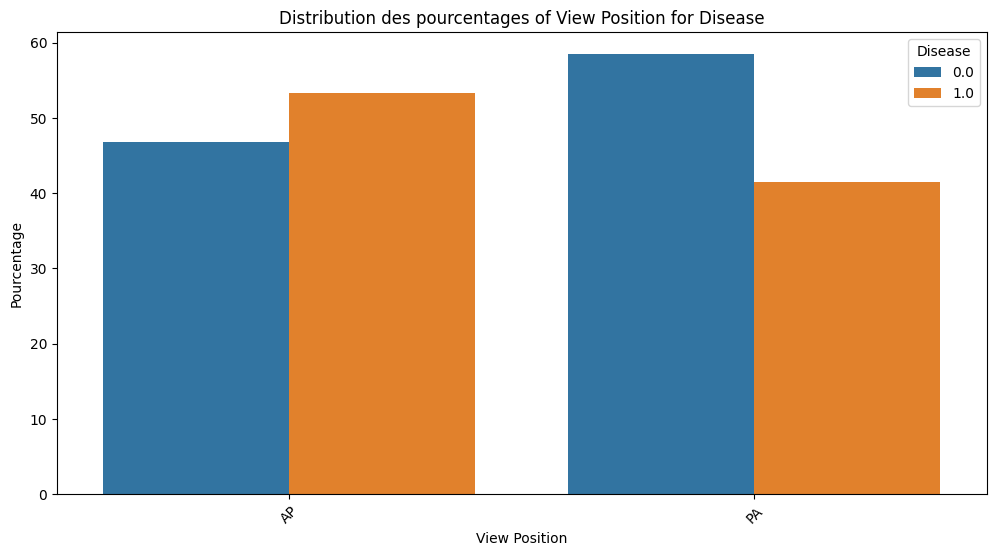

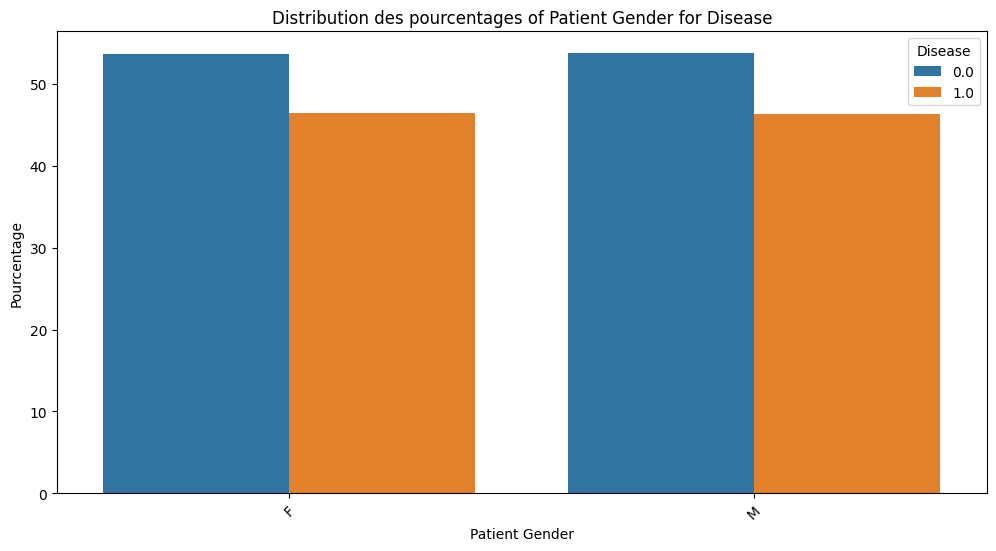

In [26]:
for cat_feature in categorical_features:
  Display_categorical_hist_percent2(cat_feature, 'Disease')

On peut remarquer un possible biais entre View Position et Maladie. En effet la probabilité d'être malade est plus importnate que celle de ne pas l'être lorsque la View Position est "AP", alors que c'est l'inverse sinon. Ce biais potentiel ne semble pas exister entre View Position et Infiltration.

La feature Patient Gender ne semble pas créer de biais avec Maladie ou Infiltration (même probabilité dominante avec environ 2% seulement de différence)

### Dispersion ?

## Table de contigence

In [27]:
for x in df_filtered.columns :
    print(pd.crosstab(df_filtered[x], df_filtered["Disease"])) # on utilise crosstab de pandas

Disease           0.0  1.0
Image Index               
00000018_000.png    1    0
00000056_000.png    0    1
00000056_001.png    0    1
00000104_000.png    0    1
00000104_001.png    1    0
...               ...  ...
00030749_000.png    1    0
00030754_000.png    0    1
00030792_000.png    1    0
00030792_001.png    1    0
00030793_000.png    0    1

[5243 rows x 2 columns]
Disease       0.0  1.0
Follow-up #           
0            1025  475
1             411  260
2             251  204
3             177  159
4             128  137
...           ...  ...
104             0    1
105             0    1
106             0    1
107             1    0
108             1    0

[109 rows x 2 columns]
Disease     0.0  1.0
Patient ID          
18            1    0
56            0    2
104           1    1
160           1    0
171           1    0
...         ...  ...
30734         1    0
30749         1    0
30754         0    1
30792         2    0
30793         0    1

[1500 rows x 2 columns]
Dis

In [28]:
# on ajoute une colonne pour l'âge en décennie (plus facile à examiner)
bins_age = list(range(0, 121, 10))  # Tranches de 10 ans (0-10, 11-20, ..., 111-120)
age = [f"{b}-{b+9}" for b in bins_age[:-1]] 

# Ajout d'une nouvelle colonne avec les groupes d'âges
df_filtered['Age Group'] = pd.cut(df_filtered['Patient Age'], bins=bins_age, labels=age, right=False)


bins_followup = list(range(0, 183, 5))  
folup = [f"{b}-{b+4}" for b in bins_followup[:-1]]
df_filtered['Follow-up Group'] = pd.cut(df_filtered['Follow-up #'], bins=bins_followup, labels=folup, right=False)

In [29]:
df_filtered

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease,Age Group,Follow-up Group
0,00000018_000.png,0,18,75,M,PA,2500,2048,0.168000,1.0,True,0.0,70-79,0-4
1,00000056_000.png,0,56,76,M,PA,2500,2048,0.168000,1.0,True,1.0,70-79,0-4
2,00000056_001.png,1,56,76,M,PA,2992,2991,0.143000,1.0,True,1.0,70-79,0-4
3,00000104_000.png,0,104,68,F,PA,2906,2991,0.143000,1.0,True,1.0,60-69,0-4
4,00000104_001.png,1,104,69,F,PA,2734,2991,0.143000,1.0,True,0.0,60-69,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,0,30749,22,F,PA,2021,2021,0.194311,1.0,True,0.0,20-29,0-4
5239,00030754_000.png,0,30754,54,M,PA,2020,2021,0.194314,1.0,True,1.0,50-59,0-4
5240,00030792_000.png,0,30792,10,F,PA,1775,1712,0.194311,1.0,True,0.0,10-19,0-4
5241,00030792_001.png,1,30792,10,F,PA,1663,1675,0.194311,1.0,True,0.0,10-19,0-4


C:\Users\firda\AppData\Local\Temp\ipykernel_56284\4230884425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df_filtered.groupby([feature, label]).size().reset_index(name='count')
C:\Users\firda\AppData\Local\Temp\ipykernel_56284\4230884425.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_filtered.groupby(feature).size().reset_index(name='total')


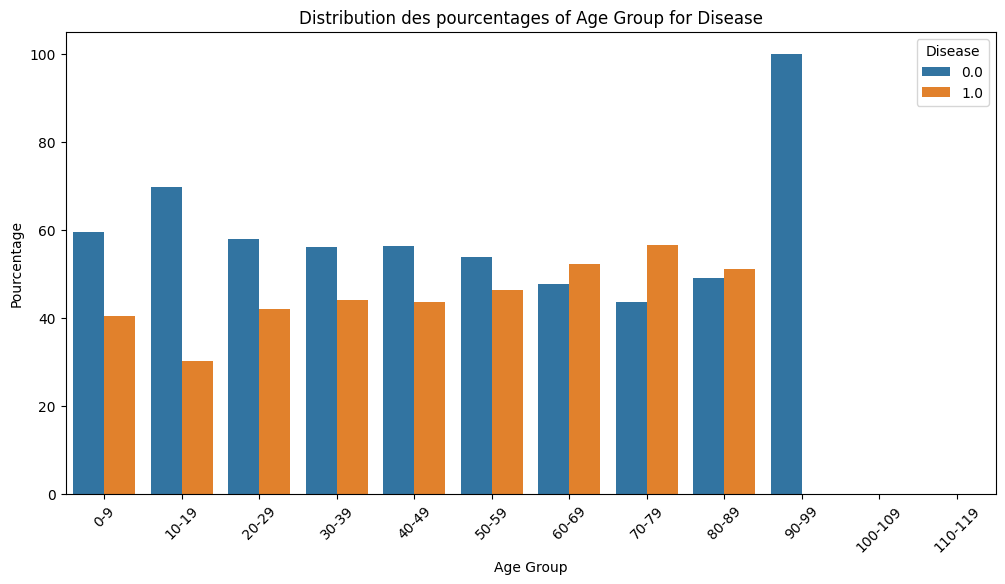

In [30]:
Display_categorical_hist_percent2('Age Group', 'Disease')

C:\Users\firda\AppData\Local\Temp\ipykernel_56284\4230884425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df_filtered.groupby([feature, label]).size().reset_index(name='count')
C:\Users\firda\AppData\Local\Temp\ipykernel_56284\4230884425.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_filtered.groupby(feature).size().reset_index(name='total')


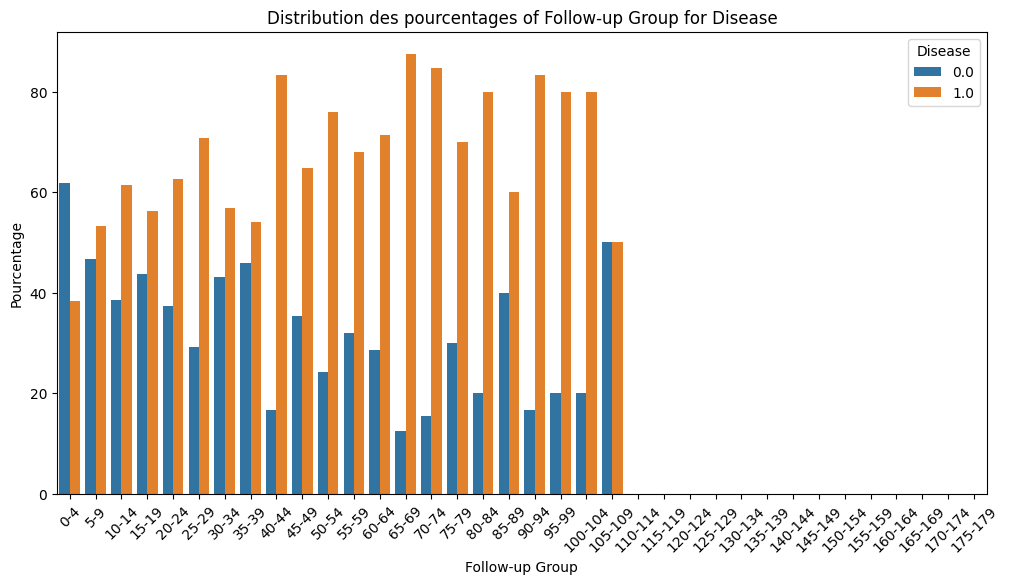

In [31]:
Display_categorical_hist_percent2('Follow-up Group', 'Disease')

On remarque un biais sur l'âge. En effet de 0 à 60 ans le patient a une probabilité plus haute de ne pas avoir de maladie. De 60 à 90 ans un patient a une probabilité plus haute d'être malade. ( Néanmoins de 90 à 100 ans la probabilité de ne pas avoir de maladie est beaucoup plus forte que celle d'en avoir une, cela est probablement dû au nombre très faible de données sur cette tranche d'âge. )

In [32]:
print("Nombre de patient de plus de 90 ans : ", df_filtered[ df_filtered['Patient Age'] >= 90].shape[0])

Nombre de patient de plus de 90 ans :  1


On remarque un autre biais sur le graphique des Follow-up. ENtre 0 et 4 Follow-up la probabilité de ne pas être malade est de plus de 60%. (Ce qui semble être logique). De 5 Follow-up à 99 Follow-up la probabilité d'être malade est plus forte. Néanmoins de 100 à 105 Follow-up la probabilité de ne pas être malade ets d'environ 50%. Ce qui ne semble pas forcement logique.

Comme précedemment cela est probablement lié au manque de données avec un aussi grand nombre de Follow-up.

In [33]:
print("Nombre de patient avec plus de 175 Follow-up : ", df_filtered[ df_filtered['Follow-up #'] >= 100].shape[0])

Nombre de patient avec plus de 175 Follow-up :  9


On décide de créer deux nouveaux attributs : 

- Age Sensible (correspond à une colonne binaire qui indique si le patient a plus de 60 ans ou non)(On a choisit le seuil de 60 ans car c'est à cet âge que l'on a remarqué un changement dans la probabilité de maladie)

- Follow-up Sensible (correspond à une colonne binaire qui indique si le patient a plus de 5 follow-up ou non)(On a choisit le seuil de 5 follow-up car c'est à ce nombre que l'on a remarqué un changement dans la probabilité de maladie)

In [34]:
df_filtered['Age Sensible'] = (df_filtered['Patient Age'] >= 60)
df_filtered['Follow-up Sensible'] = (df_filtered['Follow-up #'] >= 5)
df_filtered

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease,Age Group,Follow-up Group,Age Sensible,Follow-up Sensible
0,00000018_000.png,0,18,75,M,PA,2500,2048,0.168000,1.0,True,0.0,70-79,0-4,True,False
1,00000056_000.png,0,56,76,M,PA,2500,2048,0.168000,1.0,True,1.0,70-79,0-4,True,False
2,00000056_001.png,1,56,76,M,PA,2992,2991,0.143000,1.0,True,1.0,70-79,0-4,True,False
3,00000104_000.png,0,104,68,F,PA,2906,2991,0.143000,1.0,True,1.0,60-69,0-4,True,False
4,00000104_001.png,1,104,69,F,PA,2734,2991,0.143000,1.0,True,0.0,60-69,0-4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,00030749_000.png,0,30749,22,F,PA,2021,2021,0.194311,1.0,True,0.0,20-29,0-4,False,False
5239,00030754_000.png,0,30754,54,M,PA,2020,2021,0.194314,1.0,True,1.0,50-59,0-4,False,False
5240,00030792_000.png,0,30792,10,F,PA,1775,1712,0.194311,1.0,True,0.0,10-19,0-4,False,False
5241,00030792_001.png,1,30792,10,F,PA,1663,1675,0.194311,1.0,True,0.0,10-19,0-4,False,False


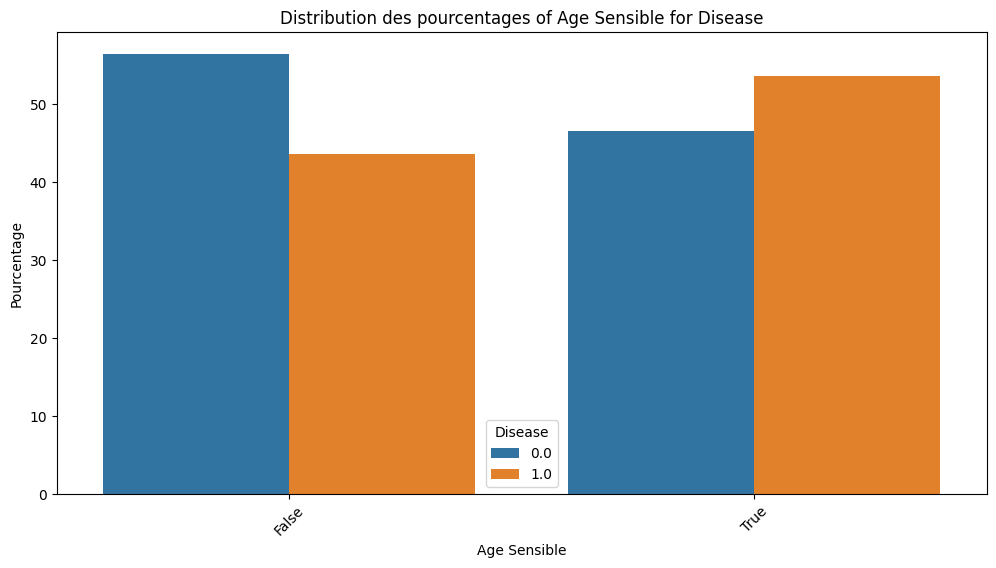

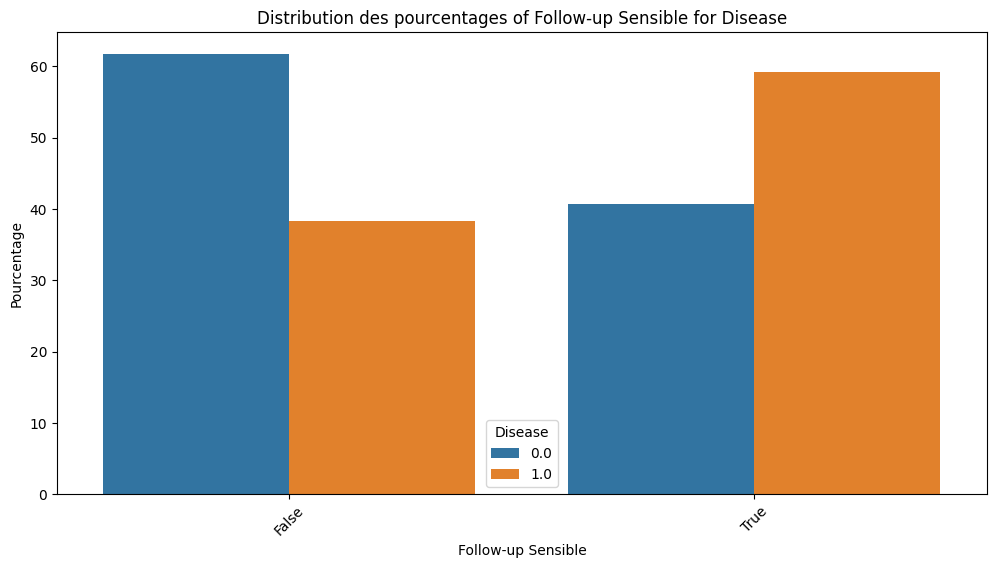

In [35]:
Display_categorical_hist_percent2('Age Sensible', 'Disease')
Display_categorical_hist_percent2('Follow-up Sensible', 'Disease')

In [36]:
from aif360.datasets import BinaryLabelDataset
from aif360.datasets import StandardDataset

In [37]:
# Drop non-numeric columns that are not needed for fairness analysis
columns_to_remove = ["Image Index", "Patient ID", "Age Group", "Follow-up Group"]
df_filtered_numeric = df_filtered.drop(columns=columns_to_remove, errors="ignore")


In [38]:
# Convert categorical columns to numeric
df_filtered_numeric["Patient Gender"] = df_filtered_numeric["Patient Gender"].map({"M": 1, "F": 0})
df_filtered_numeric["View Position"] = df_filtered_numeric["View Position"].map({"PA": 1.0, "AP": 0.0})



In [39]:
# Define privileged and unprivileged groups (for gender bias)
privileged_groups = [{'Patient Gender': 1}]  # Males
unprivileged_groups = [{'Patient Gender': 0}]  # Females


In [40]:

# Convert dataset to AIF360 format
MyDataset = StandardDataset(
    df=df_filtered_numeric,
    label_name="Disease", 
    favorable_classes=[1],  # 1 = Disease present
    protected_attribute_names=["Patient Gender"], # 1 = Male, privileged class is Male
    privileged_classes=[[1]],
    instance_weights_name="WEIGHTS",
    categorical_features=["View Position"],
    features_to_keep=[],
    features_to_drop=[],
    na_values=["?", "Unknown/Invalid"],
    custom_preprocessing=None,
    metadata=None,
)

In [41]:
from aif360.algorithms.preprocessing import *

RW = Reweighing(
    unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups
)

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
C:\Users\firda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\inFairness\utils\ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
C:\Users\firda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\inFairness\utils\ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and wi

In [42]:
print("Before reweighing:", df_filtered_numeric.WEIGHTS[:10])

Before reweighing: 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: WEIGHTS, dtype: float64


In [44]:
RW.fit(MyDataset)
dataset_transformed = RW.transform(MyDataset)

In [45]:
# Convert back to DataFrame
df_transformed = dataset_transformed.convert_to_dataframe()[0]


In [50]:
print("After reweighing:", dataset_transformed.instance_weights[:10])

After reweighing: [0.99889755 1.00128023 1.00128023 0.99860868 1.00120408 1.00120408
 1.00120408 0.99889755 1.00128023 1.00128023]


In [51]:
# Extract the original and transformed weights
df_comparison = df_filtered_numeric.copy()  # Copy original dataframe

# Add original weights
df_comparison["Original Weights"] = MyDataset.instance_weights

# Add transformed weights
df_comparison["Transformed Weights"] = dataset_transformed.instance_weights

df_comparison

,Follow-up #,Patient Age,Patient Gender,View Position,OriginalImage_width,OriginalImage_height,OriginalImagePixelSpacing_x,WEIGHTS,train,Disease,Age Sensible,Follow-up Sensible,Original Weights,Transformed Weights
0,0,75,1,1.0,2500,2048,0.168000,1.0,True,0.0,True,False,1.0,0.998898
1,0,76,1,1.0,2500,2048,0.168000,1.0,True,1.0,True,False,1.0,1.001280
2,1,76,1,1.0,2992,2991,0.143000,1.0,True,1.0,True,False,1.0,1.001280
3,0,68,0,1.0,2906,2991,0.143000,1.0,True,1.0,True,False,1.0,0.998609
4,1,69,0,1.0,2734,2991,0.143000,1.0,True,0.0,True,False,1.0,1.001204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5238,0,22,0,1.0,2021,2021,0.194311,1.0,True,0.0,False,False,1.0,1.001204
5239,0,54,1,1.0,2020,2021,0.194314,1.0,True,1.0,False,False,1.0,1.001280
5240,0,10,0,1.0,1775,1712,0.194311,1.0,True,0.0,False,False,1.0,1.001204
5241,1,10,0,1.0,1663,1675,0.194311,1.0,True,0.0,False,False,1.0,1.001204
